In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
file = open('LLZO_2/PCDAT', 'r')
lines = file.readlines()
pcskal = float(lines[8])
pcfein = float(lines[9])
PCF = lines[12:]
PCF = np.array(PCF, dtype='float')
r = np.arange(PCF.size)*(pcskal/pcfein)*1e10
file.close()

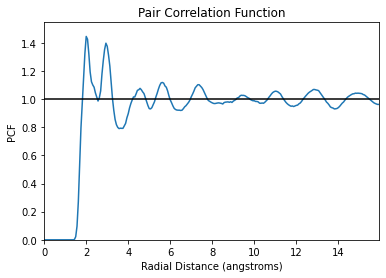

In [3]:
plt.plot(r, PCF)
plt.plot([min(r), max(r)], [1, 1], color='black')
plt.xlabel('Radial Distance (angstroms)')
plt.xlim([min(r), max(r)])
plt.ylim([min(PCF), max(PCF)+.1])
plt.ylabel('PCF')
plt.title('Pair Correlation Function')
plt.show()

In [4]:
file = open('LLZO_2/OUTCAR', 'r')
lines = file.readlines()
energy = np.array([])
for line in lines:
    if 'free  energy' in line:
        values = re.findall(r"[-+]?\d*\.\d+|\d+", line)
        energy = np.append(energy, float(values[0]))
file.close()

In [5]:
file = open('LLZO_2/output_file')
lines = file.readlines()
T = np.array([])
for line in lines:
    if 'T=' in line:
        values = re.findall(r"[-+]?\d*\.\d+|\d+", line)
        T = np.append(T, float(values[1]))
file.close()

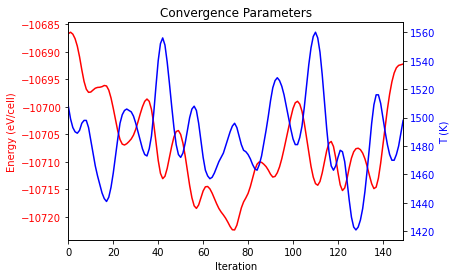

In [6]:
fig, ax1 = plt.subplots()
ax1.plot(energy, color='red')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Energy (eV/cell)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(T, color='blue')
ax2.set_ylabel('T (K)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.autoscale(enable=True, axis='x', tight=True)

plt.title('Convergence Parameters')
plt.show()